In [3]:
!pip install -U layoutparser

In [4]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-anhhl41j/detectron2_f010bc0cf3d542c2896eba2de2601c26
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-anhhl41j/detectron2_f010bc0cf3d542c2896eba2de2601c26
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done
  Using cached google_auth-2.27.0-py2.py3-none-any.whl (186 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.35.0
    Uninstalling google-auth-1.35.0:
      Successfully uninstalled google-auth-1.35.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires coher

In [5]:
!pip install layoutparser[ocr]

  Using cached google_auth-1.35.0-py2.py3-none-any.whl (152 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
bigframes 0.19.2 requires google-auth<3.0dev,>2.14.1, but you have google-auth 1.35.0 which is incompatible.
google-auth-oauthlib 1.2.0 requires google-auth>=2.15.0, but you have google-auth 1.35.0 which is incompatible.
google-cloud-aiplatform 1.39.0 requires google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<3.0.0dev,>=1.32.0, but you have google-api-core 1.31.5 which is incompat

In [6]:
!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


In [7]:
%cd layout-parser/

/content/layout-parser


In [8]:
import cv2
image = cv2.imread("/content/layout-parser/examples/data/img.jpeg")
image = image[..., ::-1]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


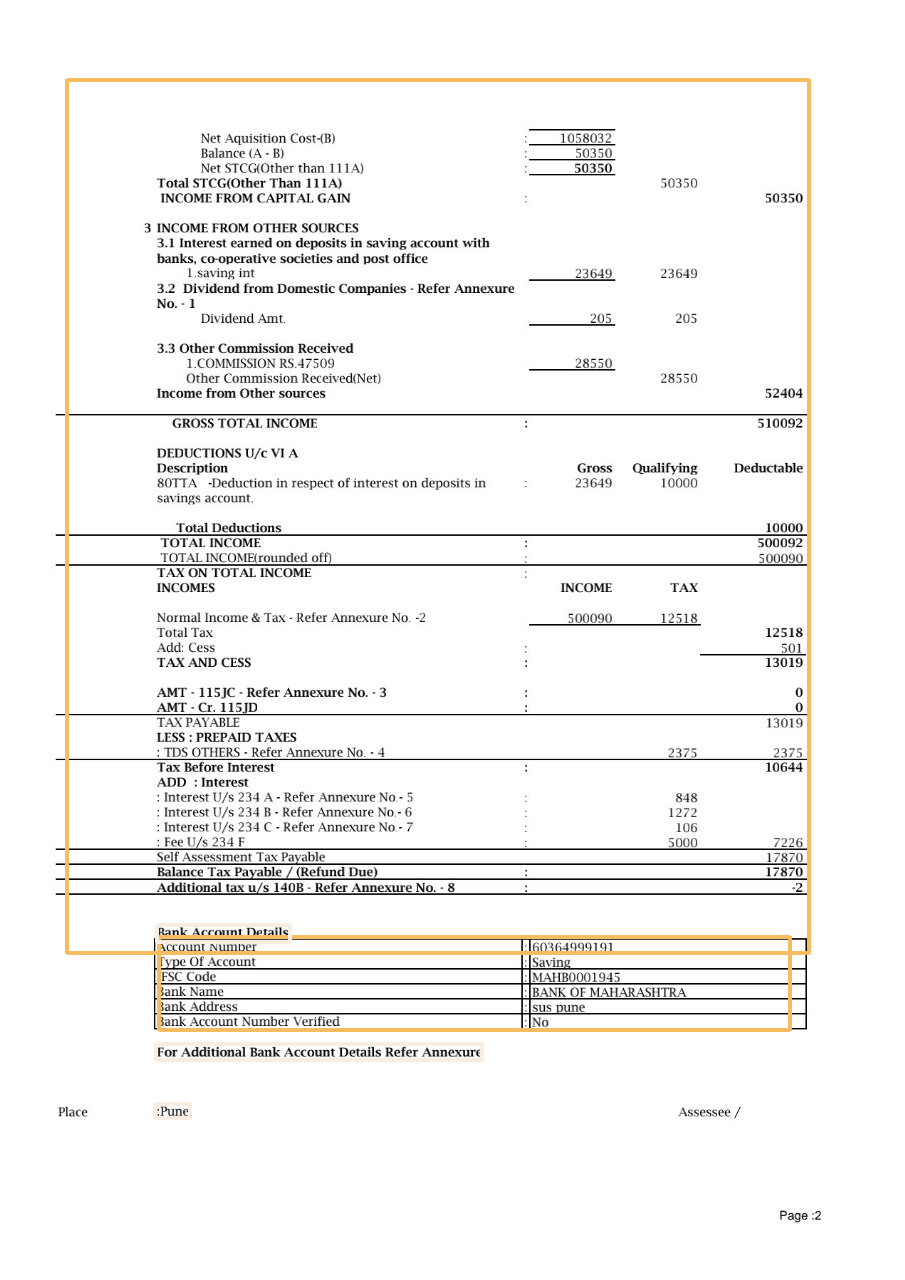

In [9]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [10]:
text_blocks = lp.Layout([b for b in layout if b.type=="Table"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=67.53726196289062, y_1=79.12532043457031, x_2=808.8834228515625, y_2=953.6427612304688), text=None, id=None, type=Table, parent=None, next=None, score=0.9403517246246338), TextBlock(block=Rectangle(x_1=159.14683532714844, y_1=936.96923828125, x_2=789.9180908203125, y_2=1030.6871337890625), text=None, id=None, type=Table, parent=None, next=None, score=0.867461621761322)], page_data={})

In [11]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [12]:
figure_blocks

Layout(_blocks=[], page_data={})

In [13]:

text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [14]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

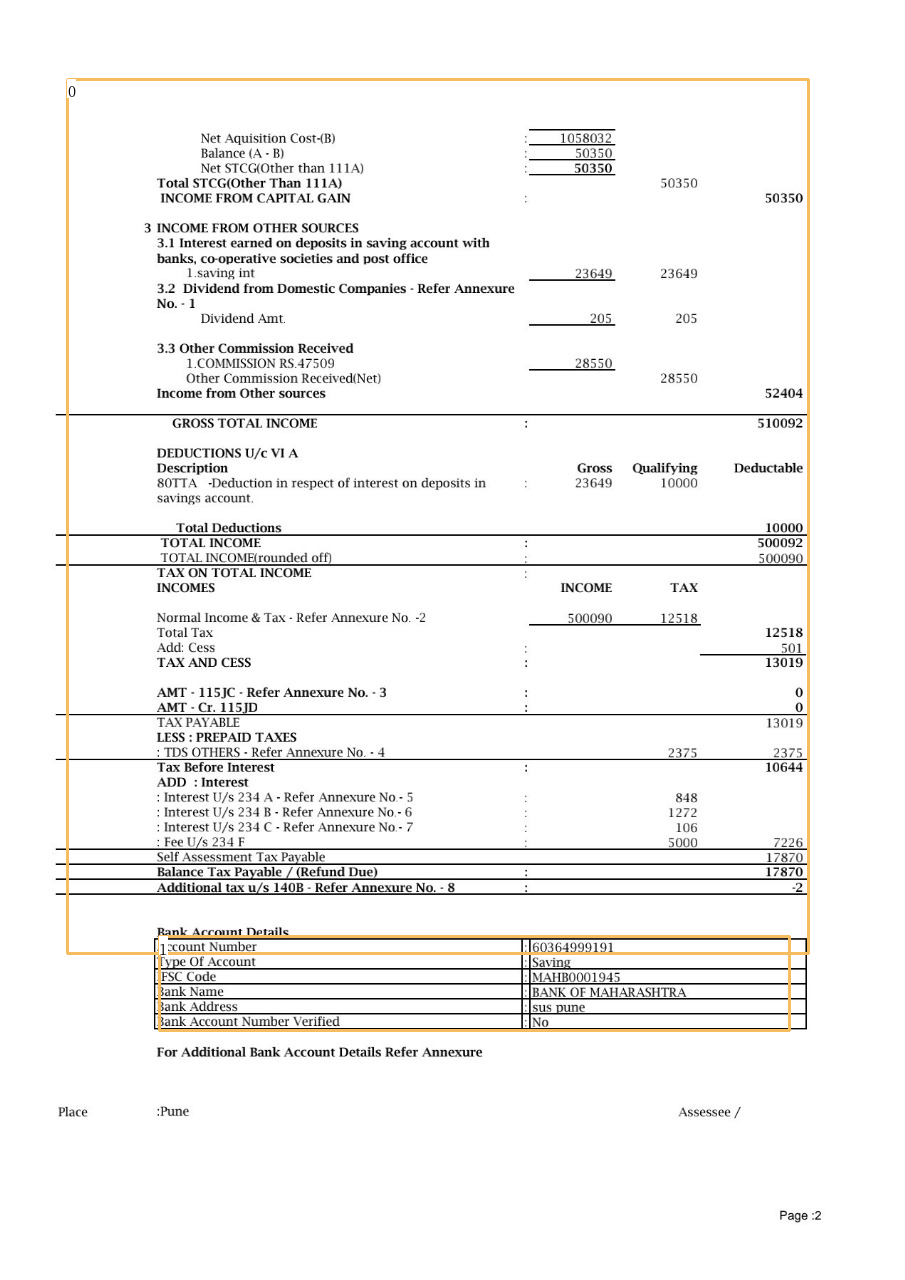

In [15]:

lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_id=True)

In [16]:
!pip install google-api-core==1.31.5
!pip install layoutparser[ocr]
!pip install --upgrade google-cloud-vision
!pip install virtualenv
!python -m venv myenv
!source myenv/bin/activate  # On Windows, use `myenv\Scripts\activate`
!pip install google-api-core==1.31.5
!pip install layoutparser[ocr]

#ocr_agent = lp.TesseractAgent(languages='eng')
    # Initialize the tesseract ocr engine. You might need
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

  Using cached google_cloud_vision-3.6.0-py2.py3-none-any.whl (457 kB)
  Using cached google_api_core-2.16.1-py3-none-any.whl (135 kB)
  Using cached google_auth-2.27.0-py2.py3-none-any.whl (186 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.35.0
    Uninstalling google-auth-1.35.0:
      Successfully uninstalled google-auth-1.35.0
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.31.5
    Uninstalling google-api-core-1.31.5:
      Successfully uninstalled google-api-core-1.31.5
  Attempting uninstall: google-cloud-vision
    Found existing installation: google-cloud-vision 1.0.0
    Uninstalling google-cloud-vision-1.0.0:
      Successfully uninstalled google-cloud-vision-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
l

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/layout-parser/myenv/bin/python3

/bin/bash: line 1: myenv/bin/activate: No such file or directory
  Using cached google_api_core-1.31.5-py2.py3-none-any.whl (93 kB)
  Using cached google_auth-1.35.0-py2.py3-none-any.whl (152 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.16.1
    Uninstalling google-api-core-2.16.1:
      Successfully uninstalled google-api-core-2.16.1
ERROR: pip's dependency resolve

  Using cached google_cloud_vision-1.0.0-py2.py3-none-any.whl (435 kB)
  Attempting uninstall: google-cloud-vision
    Found existing installation: google-cloud-vision 3.6.0
    Uninstalling google-cloud-vision-3.6.0:
      Successfully uninstalled google-cloud-vision-3.6.0


In [17]:
ocr_agent = lp.TesseractAgent(languages='eng')

In [18]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,669 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [19]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [20]:
import re
for txt in text_blocks.get_texts():
# Provided text
    provided_text = txt
    # Define a regular expression pattern to match the "GROSS TOTAL INCOME" value
    gross_total_pattern = r'GROSS TOTAL INCOME (\d+)'
    total_income_rounded_off_pattern = r'TOTAL INCOME\(rounded off\) (\d+)'

    # Search for the patterns in the provided text
    match_gross_total = re.search(gross_total_pattern, provided_text)
    match_total_income_rounded_off = re.search(total_income_rounded_off_pattern, provided_text)

    # Check if matches are found
    if match_gross_total:
        # Extract the "GROSS TOTAL INCOME" value
        gross_total_income = match_gross_total.group(1)
        print("GROSS TOTAL INCOME:", gross_total_income)

    if match_total_income_rounded_off:
        # Extract the "TOTAL INCOME(rounded off)" value
        total_income_rounded_off = match_total_income_rounded_off.group(1)
        print("TOTAL INCOME(rounded off):", total_income_rounded_off)

GROSS TOTAL INCOME: 310092
TOTAL INCOME(rounded off): 500090


In [21]:
import re

# Provided text
provided_text = text_blocks.get_texts()
# Define a regular expression pattern to match the "GROSS TOTAL INCOME" value
gross_total_pattern = r'GROSS TOTAL INCOME (\d+)'

# Search for the pattern in the provided text
match = re.search(gross_total_pattern, provided_text)

# Check if a match is found
if match:
    # Extract the "GROSS TOTAL INCOME" value
    gross_total_income = match.group(1)
    print("GROSS TOTAL INCOME:", gross_total_income)
else:
    print("GROSS TOTAL INCOME not found in the provided text.")


TypeError: expected string or bytes-like object

In [ ]:
for block in text_blocks:
  print(block)

In [ ]:
!pip install spacy

In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

In [ ]:
!pip install click==7.1.1

In [ ]:
!pip install --upgrade transformers
!pip install virtualenv
!python -m venv myenv
!source myenv/bin/activate  # On Windows, use `myenv\Scripts\activate`
!pip install transformers




In [ ]:
!pip install transformers==4.26.0
import spacy
nlp = spacy.load("en_core_web_trf")

In [ ]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [ ]:
".".join(sentence)

In [ ]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)

In [ ]:
import pytesseract
from PIL import Image
import csv

# Function to extract text from an image using OCR
def extract_text_from_image(image_path):
    image = Image.open(image_path)
    extracted_text = pytesseract.image_to_string(image)
    return extracted_text

# Function to parse the extracted text and find values for GROSS TOTAL INCOME and TOTAL INCOME(rounded off)
def parse_extracted_text(text):
    gross_total_pattern = r'GROSS TOTAL INCOME (\d+)'
    total_income_rounded_off_pattern = r'TOTAL INCOME\(rounded off\) (\d+)'

    match_gross_total = re.search(gross_total_pattern, text)
    match_total_income_rounded_off = re.search(total_income_rounded_off_pattern, text)

    gross_total_income = match_gross_total.group(1) if match_gross_total else "Not found"
    total_income_rounded_off = match_total_income_rounded_off.group(1) if match_total_income_rounded_off else "Not found"

    return gross_total_income, total_income_rounded_off

# List of image paths
image_paths = ["image_0_1.jpeg", "image_1_1.jpeg", "image_2_1.jpeg"]

# List to store extracted data
extracted_data = []

# Loop through each image
for image_path in image_paths:
    # Extract text from the image
    extracted_text = extract_text_from_image(image_path)

    # Parse the extracted text to find values for GROSS TOTAL INCOME and TOTAL INCOME(rounded off)
    gross_total_income, total_income_rounded_off = parse_extracted_text(extracted_text)

    # Append the data to the list
    extracted_data.append({
        "Image": image_path,
        "GROSS TOTAL INCOME": gross_total_income,
        "TOTAL INCOME(rounded off)": total_income_rounded_off
    })

# Write the data to a CSV file
csv_file_path = "extracted_data.csv"
fields = ["Image", "GROSS TOTAL INCOME", "TOTAL INCOME(rounded off)"]

with open(csv_file_path, mode='w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fields)

    # Write the header
    writer.writeheader()

    # Write the data
    writer.writerows(extracted_data)

print(f"Data has been extracted and saved to {csv_file_path}.")
